In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_mat = pd.read_csv('student-mat.csv',sep = ';')

In [3]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df_mat.drop('school',axis = 1, inplace = True)

In [5]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

In [6]:
df_mat.shape

(395, 32)

In [7]:
df_mat.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10


In [8]:
# our dataset has some Non categorical Values let's change it:
#  categorize age into 3 classes:
def age(age):
    new_age=[]
    for i in age:
        if(i < 17):
            i=0
        elif (i < 19):
            i=1
        else:
            i=2
        new_age.append(i)
    return new_age

df_mat['age']=age(df_mat['age'])
df_mat.head()



,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,1,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,1,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,0,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,0,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,0,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10


<AxesSubplot:xlabel='age', ylabel='G3'>

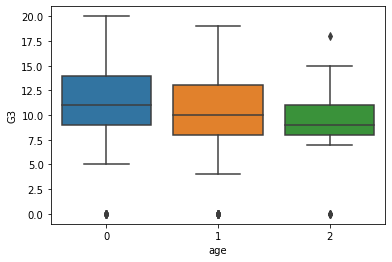

In [9]:
sns.boxplot(x='age',y='G3',data=df_mat)

Students of Age Less than 17 has higher median of scoring whereas students of age> 19 has lowest mean.

In [10]:
# comparing Performance of male and female students 
df_mat['sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0      F
1      F
2      F
3      F
4      F
      ..
390    M
391    M
392    M
393    M
394    M
Name: sex, Length: 395, dtype: object>

<AxesSubplot:xlabel='sex', ylabel='G3'>

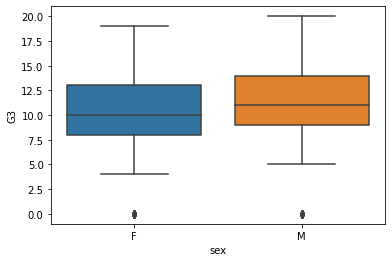

In [11]:
sns.boxplot(x ='sex', y ='G3', data = df_mat)

Male students have better performance in school than the female students. Since the median score of boys is more than girls and the maximum marks also

In [12]:
df_mat['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

<AxesSubplot:xlabel='address', ylabel='G3'>

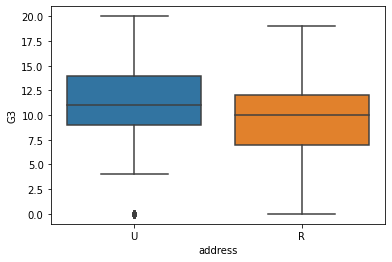

In [13]:
sns.boxplot('address','G3',data=df_mat)

Students living in Urban Areas has better performance than students coming from Rural Areas.


In [14]:
df_mat['famsize'].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

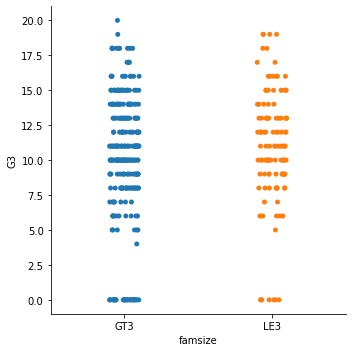

In [15]:
sns.catplot(x="famsize", y="G3", data=df_mat)

<AxesSubplot:xlabel='famsize', ylabel='G3'>

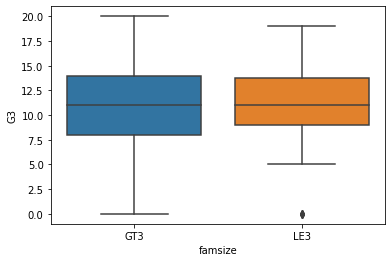

In [16]:
sns.boxplot(x = 'famsize', y = 'G3', data = df_mat)

since family size doesn't tell much about this. I will drop this column.

In [17]:
df_mat.drop('famsize', axis = 1)

,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,1,U,A,4,4,at_home,teacher,course,mother,...,4,3,4,1,1,3,6,5,6,6
1,F,1,U,T,1,1,at_home,other,course,father,...,5,3,3,1,1,3,4,5,5,6
2,F,0,U,T,1,1,at_home,other,other,mother,...,4,3,2,2,3,3,10,7,8,10
3,F,0,U,T,4,2,health,services,home,mother,...,3,2,2,1,1,5,2,15,14,15
4,F,0,U,T,3,3,other,other,home,father,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,2,U,A,2,2,services,services,course,other,...,5,5,4,4,5,4,11,9,9,9
391,M,1,U,T,3,1,services,services,course,mother,...,2,4,5,3,4,2,3,14,16,16
392,M,2,R,T,1,1,other,other,course,other,...,5,5,3,3,3,3,3,10,8,7
393,M,1,R,T,3,2,services,other,course,mother,...,4,4,1,3,4,5,0,11,12,10


In [18]:
df_mat['Pstatus'].value_counts()

T    354
A     41
Name: Pstatus, dtype: int64

<AxesSubplot:xlabel='Pstatus', ylabel='G3'>

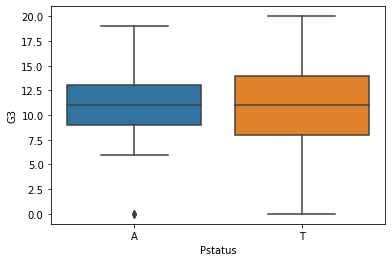

In [19]:
sns.boxplot("Pstatus","G3", data = df_mat)

Students whose parents lived togethar tend to perfor better

<AxesSubplot:xlabel='Medu', ylabel='G3'>

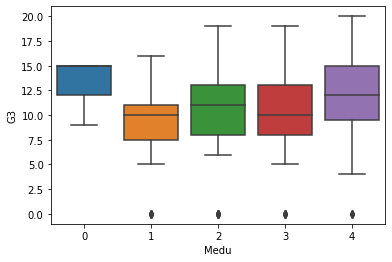

In [20]:
sns.boxplot(x='Medu',y='G3',data=df_mat)

Students whose mother has been more educated tend to perform better

In [21]:
df_mat['Fedu'].value_counts()

2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64

<AxesSubplot:xlabel='Fedu', ylabel='G3'>

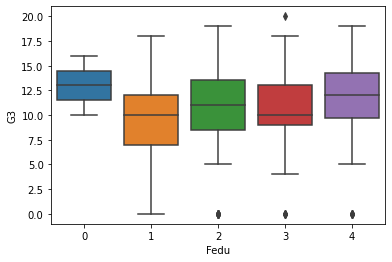

In [22]:
sns.boxplot(x='Fedu',y='G3',data=df_mat)

Students whose fathers have completed higher education have slightly better chance of performing well in exams.

In [23]:
def absences(n):
    new=[]
    for i in n:    
        if (i <= 10):
            i=0
        elif(i <= 20):
            i=1
        else:
            i=2
        new.append(i)
    return new
df_mat['absences']=absences(df_mat['absences'])

<AxesSubplot:xlabel='absences', ylabel='G3'>

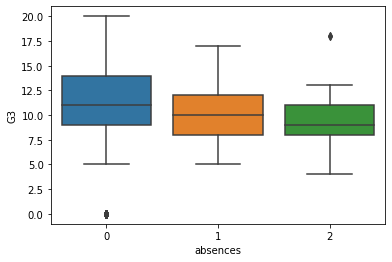

In [24]:
sns.boxplot("absences","G3", data = df_mat)

Students who has lower absents tends to perform better


In [25]:
df_mat.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,1,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,0,5,6,6
1,F,1,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,0,5,5,6
2,F,0,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,0,7,8,10
3,F,0,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,0,15,14,15
4,F,0,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,0,6,10,10


In [26]:
df_mat['sex'] = df_mat['sex'].map({'M': 0, 'F': 1})
df_mat['address'] = df_mat['address'].map({'U': 0, 'R': 1})
df_mat['internet'] = df_mat['internet'].map({'no': 0, 'yes': 1})
df_mat['famsize'] = df_mat['famsize'].map({'LE3':0, 'GT3': 1})
df_mat['Pstatus'] = df_mat['Pstatus'].map({'A':0, 'T':'1'})
df_mat['Mjob'] = df_mat['Mjob'].map({'at_home':0, 'health':1, 'teacher':3,'services':4,'other':5})
df_mat['Fjob'] = df_mat['Fjob'].map({'at_home':0, 'health':1, 'teacher':3,'services':4,'other':5})
df_mat['reason'] = df_mat['reason'].map({'reputation':0, 'course':1,'home':2,'other':3})
df_mat['guardian'] = df_mat['guardian'].map({'father':0, 'mother':1,'other':2})

d= {'yes':0, 'no':1}
df_mat['schoolsup'] = df_mat['schoolsup'].map(d)
df_mat['famsup'] = df_mat['famsup'].map(d)
df_mat['paid'] = df_mat['paid'].map(d)
df_mat['activities'] = df_mat['activities'].map(d)
df_mat['nursery'] = df_mat['nursery'].map(d)
df_mat['higher'] = df_mat['higher'].map(d)
df_mat['romantic'] = df_mat['romantic'].map(d)
df_mat.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,0,1,0,4,4,0,3,1,...,4,3,4,1,1,3,0,5,6,6
1,1,1,0,1,1,1,1,0,5,1,...,5,3,3,1,1,3,0,5,5,6
2,1,0,0,0,1,1,1,0,5,3,...,4,3,2,2,3,3,0,7,8,10
3,1,0,0,1,1,4,2,1,4,2,...,3,2,2,1,1,5,0,15,14,15
4,1,0,0,1,1,3,3,5,5,2,...,4,3,2,1,2,5,0,6,10,10


In [27]:
def change(df):
    new_G3 = []
    for i in df:
        if(i > 8):
            i = 1
        else:
            i = 0
        new_G3.append(i)
    return new_G3
df_mat['G3'] = change(df_mat['G3'])

In [28]:
pd.isnull(df_mat).sum() 
df_mat.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,0,1,0,4,4,0,3,1,...,4,3,4,1,1,3,0,5,6,0
1,1,1,0,1,1,1,1,0,5,1,...,5,3,3,1,1,3,0,5,5,0
2,1,0,0,0,1,1,1,0,5,3,...,4,3,2,2,3,3,0,7,8,1
3,1,0,0,1,1,4,2,1,4,2,...,3,2,2,1,1,5,0,15,14,1
4,1,0,0,1,1,3,3,5,5,2,...,4,3,2,1,2,5,0,6,10,1


In [29]:
# applied KNN ALgorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df_mat.drop(['G3'], axis = 1)
y = df_mat['G3']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 42)
knn = KNeighborsClassifier(n_neighbors=3)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
knn.score(X_test,y_test)


0.898989898989899

In [33]:
# applying Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 3)
model = LogisticRegression()
model1 = model.fit(X_train,y_train)

prediction1 = model1.predict(X_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction1)
cm

array([[22,  6],
       [ 6, 85]], dtype=int64)

In [35]:
from sklearn import metrics
metrics.accuracy_score(prediction1,y_test)

0.8991596638655462